# Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Training Set

In [2]:
train_dataset = pd.read_csv('Google_Stock_Price_Train.csv')
train_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = train_dataset.iloc[:, 1:2].values
training_set[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

## Feature Scaling (Normalization)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

## Create Data Structure with t timesteps (financial steps, every 20 is equivalent to a month) and 1 output (look at t stock prices before time t, based on the trends, predict)

In [5]:
x_train = []
y_train = []
for i in range(120, len(scaled_training_set)):
    x_train.append(scaled_training_set[i-120:i, 0])
    y_train.append(scaled_training_set[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.0180445  0.0180817  0.00710618]
 [0.09701243 0.09433366 0.09156187 ... 0.0180817  0.00710618 0.0064923 ]
 [0.09433366 0.09156187 0.07984225 ... 0.00710618 0.0064923  0.00225091]
 ...
 [0.78201503 0.79792023 0.81851328 ... 0.95475854 0.95204256 0.95163331]
 [0.79792023 0.81851328 0.82688444 ... 0.95204256 0.95163331 0.95725128]
 [0.81851328 0.82688444 0.82308952 ... 0.95163331 0.95725128 0.93796041]]
[0.0064923  0.00225091 0.00682714 ... 0.95725128 0.93796041 0.93688146]


## Reshaping

Input shape: (batch_size, timesteps, input_dim)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.0180445 ],
        [0.0180817 ],
        [0.00710618]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.0180817 ],
        [0.00710618],
        [0.0064923 ]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.00710618],
        [0.0064923 ],
        [0.00225091]],

       ...,

       [[0.78201503],
        [0.79792023],
        [0.81851328],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.79792023],
        [0.81851328],
        [0.82688444],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.81851328],
        [0.82688444],
        [0.82308952],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Building the RNN

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [8]:
regressor = Sequential()

#add first LSTM layer and Dropout regularization
first_lstm_layer = LSTM(units = 80, return_sequences=True, input_shape = (x_train.shape[1], 1), )
regressor.add(first_lstm_layer)

dropout_layer = Dropout(rate = 0.2)
regressor.add(dropout_layer)

#Add 5 more LSTM Layers
#second layer
regressor.add(LSTM(units = 80, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
#third layer
regressor.add(LSTM(units = 80, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
#fourth layer
regressor.add(LSTM(units = 80, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
#fifth layer
regressor.add(LSTM(units = 80, return_sequences=True))
regressor.add(Dropout(rate = 0.2))
#sixth layer
regressor.add(LSTM(units = 80))
regressor.add(Dropout(rate = 0.2))

#add output layer
output_layer = Dense(units = 1)
regressor.add(output_layer)

#compile RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting RNN to training set

In [9]:
regressor.fit(x = x_train, y = y_train, epochs = 120, batch_size = 32, workers = 16)

Epoch 1/120
1138/1138 [==============================] - 35s 31ms/step - loss: 0.0357
Epoch 2/120
1138/1138 [==============================] - 25s 22ms/step - loss: 0.0069
Epoch 3/120
1138/1138 [==============================] - 23s 20ms/step - loss: 0.0059
Epoch 4/120
1138/1138 [==============================] - 23s 20ms/step - loss: 0.0053
Epoch 5/120
1138/1138 [==============================] - 23s 21ms/step - loss: 0.0061
Epoch 6/120
1138/1138 [==============================] - 23s 20ms/step - loss: 0.0058
Epoch 7/120
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0059
Epoch 8/120
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0053
Epoch 9/120
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0053
Epoch 10/120
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0054
Epoch 11/120
1138/1138 [==============================] - 24s 21ms/step - loss: 0.0045
Epoch 12/120
1138/1138 [============================

1138/1138 [==============================] - 33s 29ms/step - loss: 0.0015
Epoch 96/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0013
Epoch 97/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0012
Epoch 98/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0014
Epoch 99/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0016
Epoch 100/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0016
Epoch 101/120
1138/1138 [==============================] - 35s 30ms/step - loss: 0.0014
Epoch 102/120
1138/1138 [==============================] - 32s 28ms/step - loss: 0.0014
Epoch 103/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0016
Epoch 104/120
1138/1138 [==============================] - 34s 30ms/step - loss: 0.0015
Epoch 105/120
1138/1138 [==============================] - 35s 31ms/step - loss: 0.0015
Epoch 106/120
1138/1138 [=========================

# Making predictions and visualizing Results

## Get Real stock price of 2017

In [10]:
test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
test_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [11]:
real_stock_price = test_dataset.iloc[:, 1:2].values
real_stock_price[:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

## Get predicted stock price of 2017

In [12]:
dataset_total = pd.concat((train_dataset['Open'], test_dataset['Open']), axis = 0)
dataset_total.head()

0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [15]:
inputs = dataset_total[len(dataset_total)-len(test_dataset)-120:].values
inputs = inputs.reshape(-1, 1) #set to right format

#scale inputs
inputs = scaler.fit_transform(inputs)

In [16]:
x_test = []
for i in range(120, 120+len(test_dataset)):
    x_test.append(inputs[i-120:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [17]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

## Visualize Results

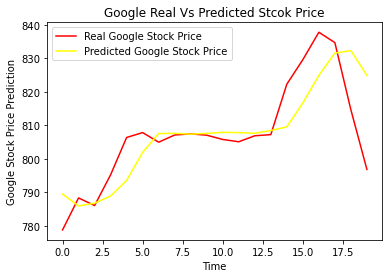

In [18]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='yellow', label='Predicted Google Stock Price')
plt.title('Google Real Vs Predicted Stcok Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price Prediction')
plt.legend()
plt.show()